## Loading libraries and dataset

In [1]:
import mlxtend
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import squarify

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules 

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



## Visualisation:

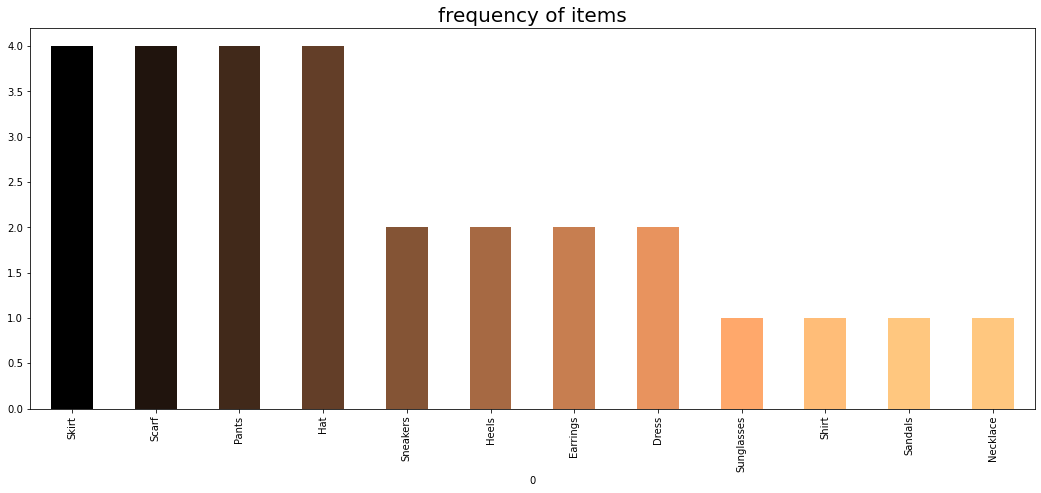

In [2]:
myList = []
for l in dataset:
    for itm in l:
        myList.append(itm)
data = pd.DataFrame(myList).value_counts()

myIndex = []
myValue = []

for index, value in data.items():
    myIndex.append(index[0])
    myValue.append(value)

# Bar plot frequency

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 2, 20))
data.plot.bar(color = color)
plt.title('frequency of items', fontsize = 20)
plt.xticks(ticks=range(0, 12), labels = myIndex)
plt.show()

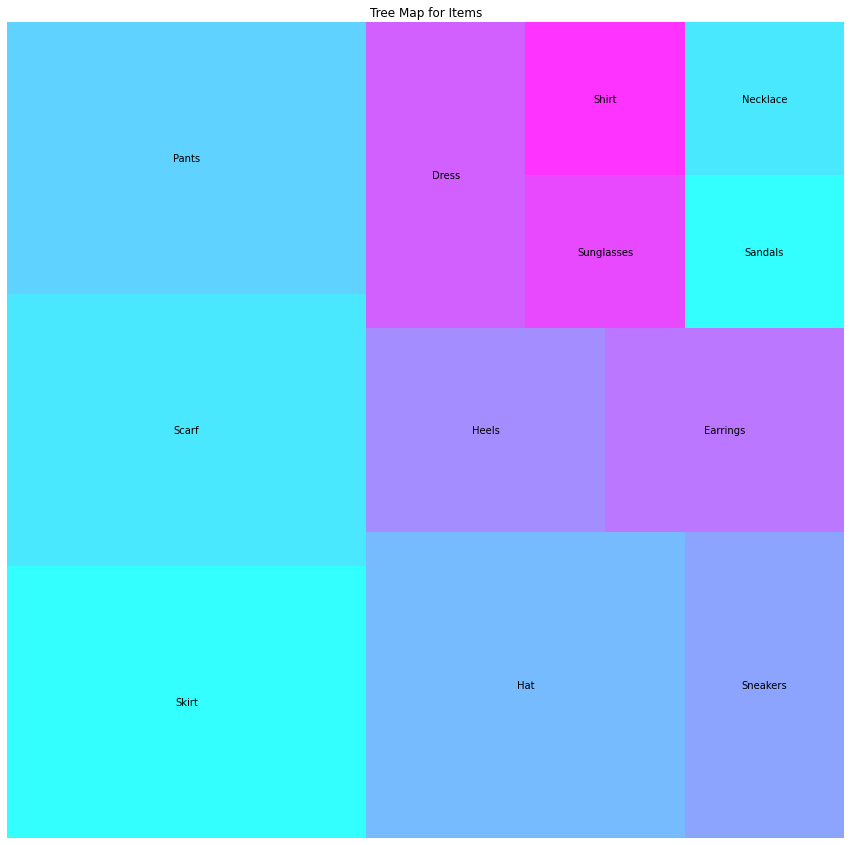

In [3]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (15, 15)
color = plt.cm.cool(np.linspace(0, 1, 10))
squarify.plot(sizes = myValue, label = myIndex, alpha=.8, color = color)
plt.title('Tree Map for Items')
plt.axis('off')
plt.show()

## Transform dataset into a one-hot-encoded Dataframe.

In [4]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)   
df=pd.DataFrame(te_ary, columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


## Support:

In [5]:
#Support calculation.
    
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


Le tableau si dessus montre les articles les plus fréquemment achetés, le stock manager devrait se réapprovisionner régulièrement pour éviter la rupture de stock.

## Confidence:

In [6]:
# Confidence calculation - associate itemsets with confidence over 60%.

association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


Selon le calcule de la confidence, on peux déduire les gégles suivantes:
- aprés avoir acheté un pants, le client à 75% de chance d'acheter un Scarf ou une Skirt.
- aprés avoir acheté un Scarf, le client à 75% de chance d'acheter un Pants.
- aprés avoir acheté une Skirt, le client à 100% de chance d'acheter un Pants.

Ces articles devront étre positionnés cote à cote.

## Lift :

In [7]:
# Lift calculation.
association_rules(frequent_itemsets,metric="lift",min_threshold=1.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf


Selon le calcule du lift, Il est plus probable d’acheter un Pants et une Skirt avec un lift de 1.25 que un Pants seul ou une Skirt seule.

# Bigger dataset !

In [8]:
from csv import reader

# read csv file as a list of lists
with open('Market_Basket_Optimisation.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    myDataset = list(csv_reader)

## Visualisation:

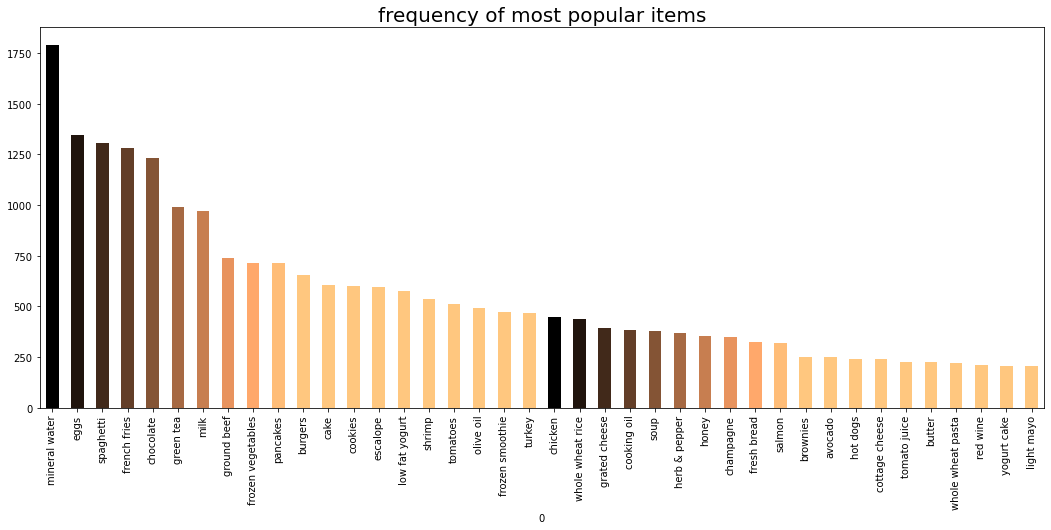

In [9]:
myList = []
for l in myDataset:
    for itm in l:
        myList.append(itm)
data = pd.DataFrame(myList).value_counts()

myIndex = []
myValue = []

for index, value in data.items():
    myIndex.append(index[0])
    myValue.append(value)

# Bar plot frequency

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 2, 20))
data.head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(ticks=range(0, 40), labels = myIndex[:40])
plt.show()

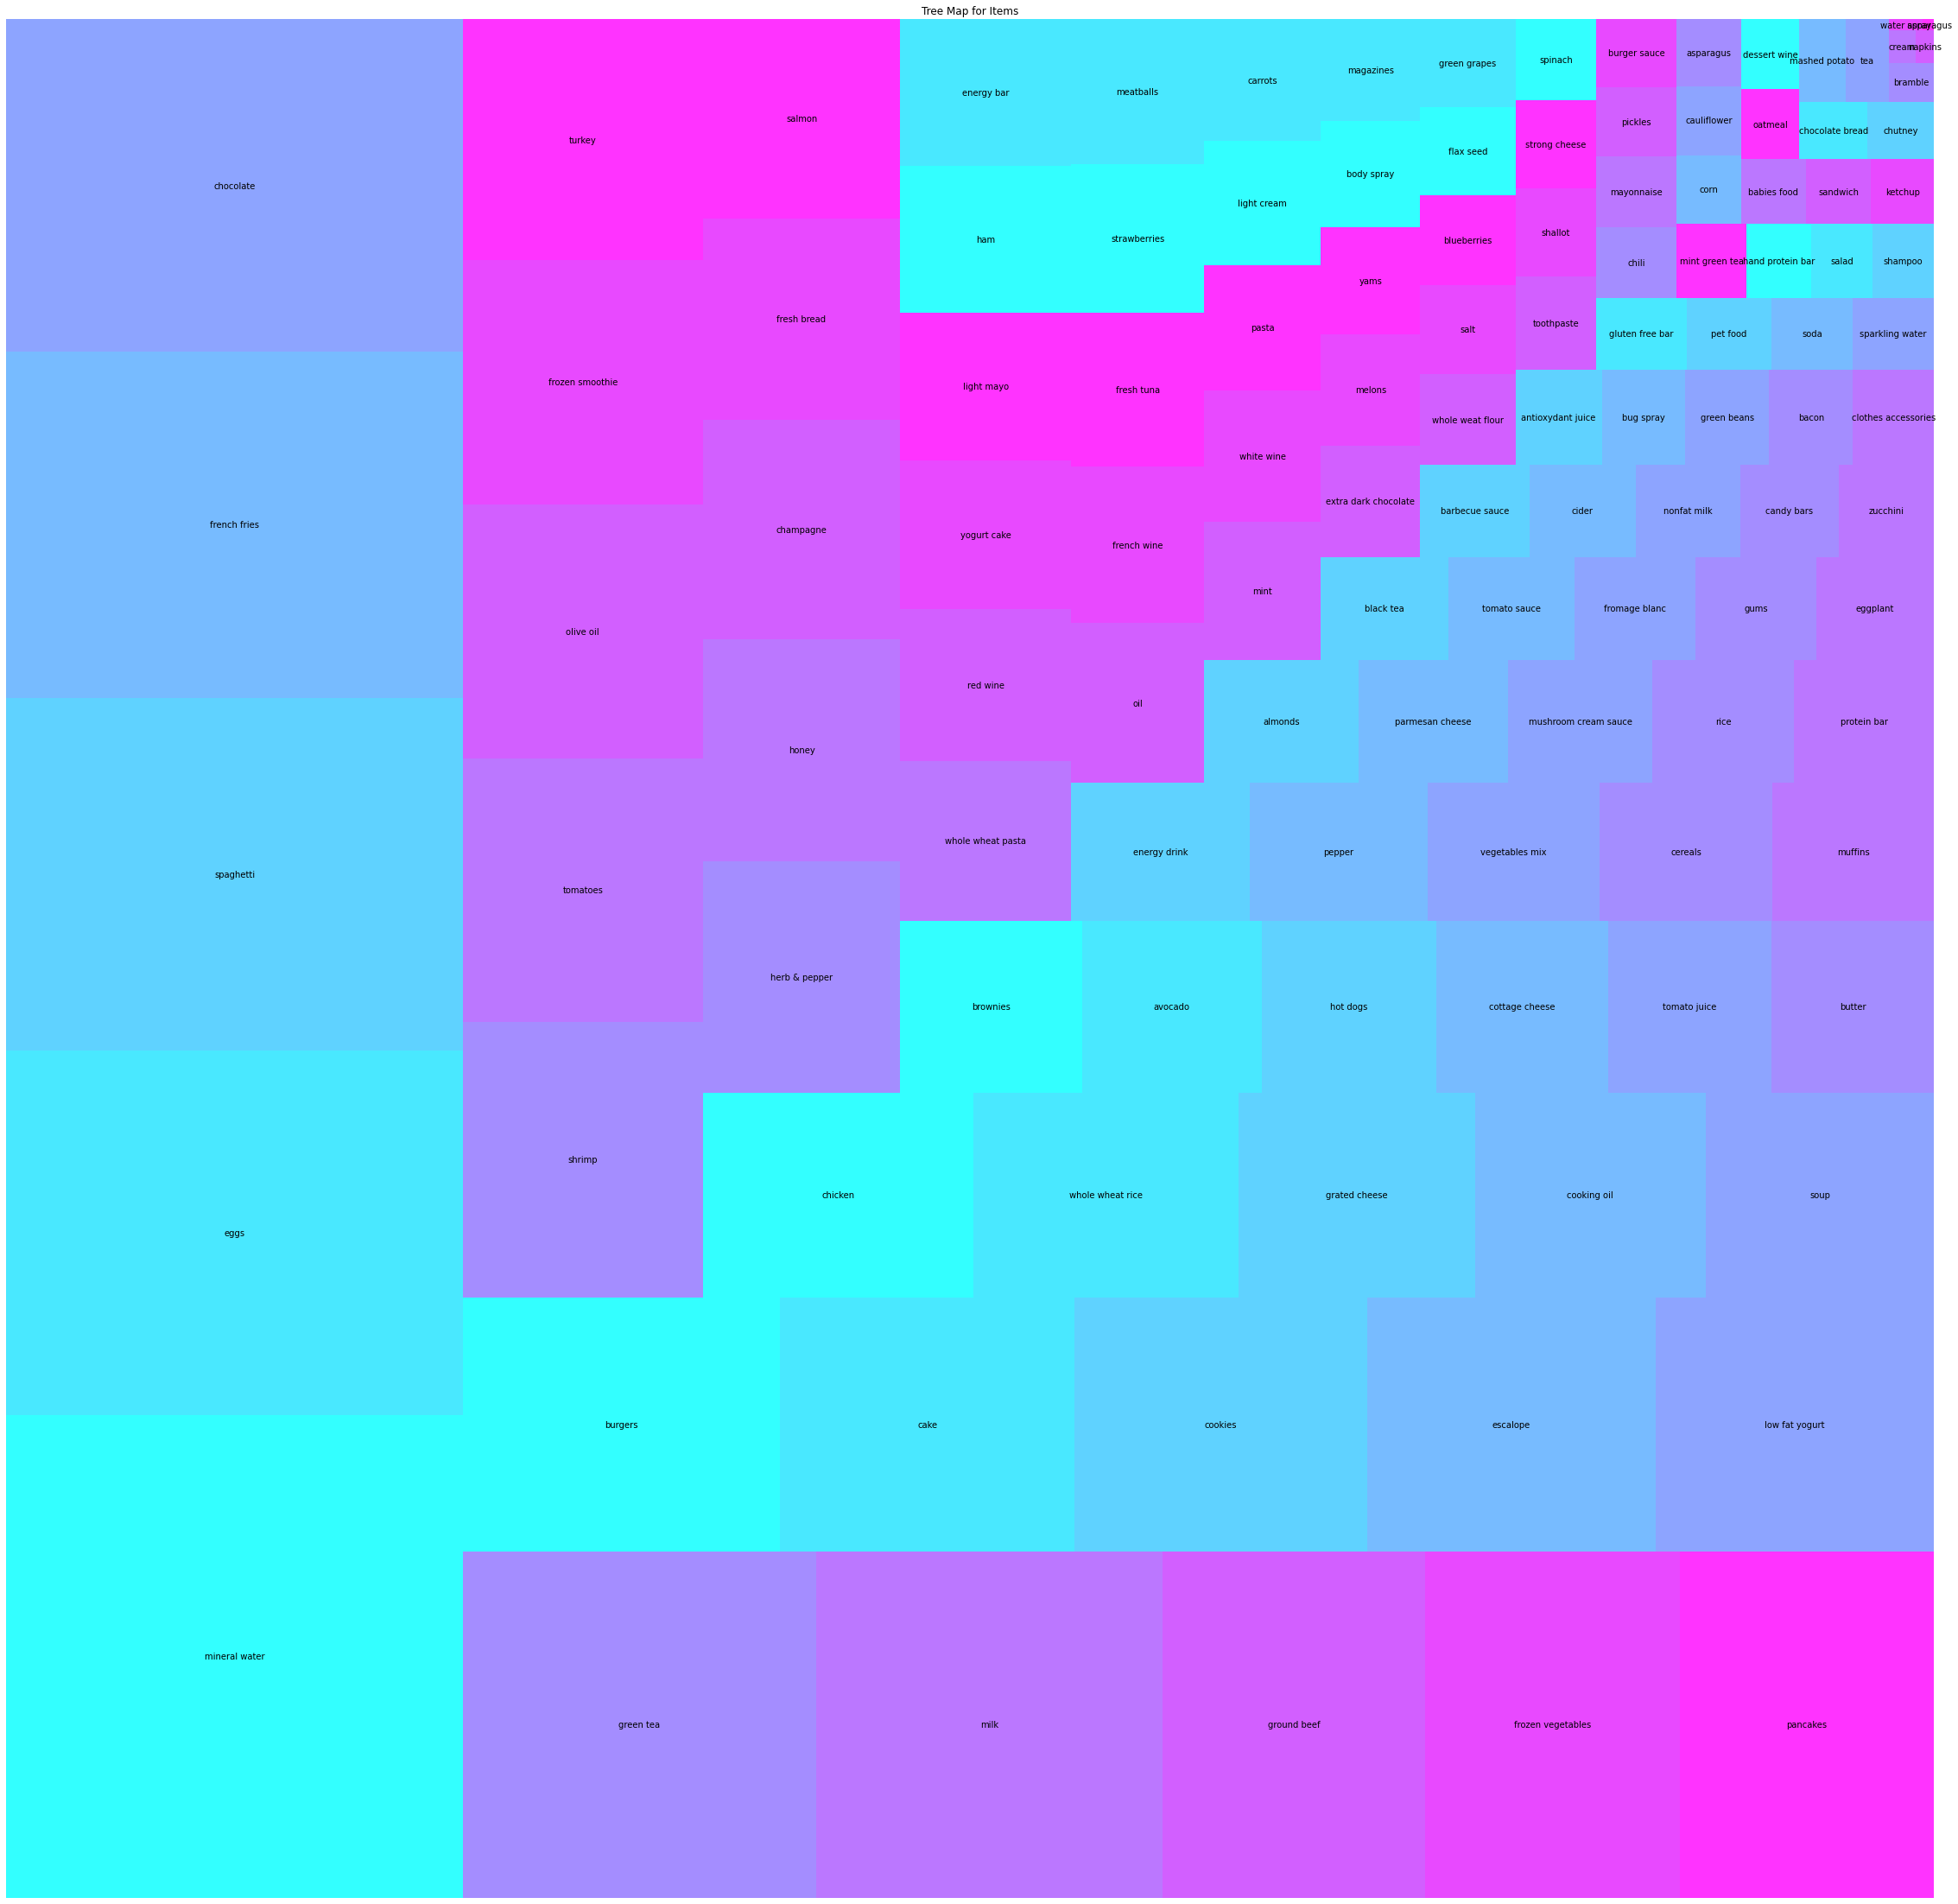

In [10]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (40, 40)
color = plt.cm.cool(np.linspace(0, 1, 10))
squarify.plot(sizes = myValue, label = myIndex, alpha=.8, color = color)
plt.title('Tree Map for Items')
plt.axis('off')
plt.show()

## Transform dataset into a one-hot-encoded Dataframe.

In [11]:
te = TransactionEncoder()
te_ary = te.fit(myDataset).transform(myDataset)
myNewDdf = pd.DataFrame(te_ary, columns=te.columns_) 
myNewDdf

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Support

In [12]:
#Support calculation.
    
frequent_itemsets=apriori(myNewDdf, min_support=0.03, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=False)

,support,itemsets
25,0.238368,(mineral water)
11,0.179709,(eggs)
31,0.174110,(spaghetti)
13,0.170911,(french fries)
7,0.163845,(chocolate)
18,0.132116,(green tea)
24,0.129583,(milk)
19,0.098254,(ground beef)
16,0.095321,(frozen vegetables)
27,0.095054,(pancakes)


## Confidence:

In [13]:
# Confidence calculation - associate itemsets with confidence over 60%.

association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
6,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
7,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
8,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640
9,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232


## Lift:

In [15]:
# Lift calculation.
association_rules(frequent_itemsets,metric="lift",min_threshold=1.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
1,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
3,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827
4,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
5,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736
6,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
9,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
